In [1]:
import findspark
findspark.init()

In [2]:
# spark session 생성
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [3]:
# data loading (스키마 추론 사용)
covid_usa = spark\
.read\
.option("inferSchema", "true")\
.option("header", "true")\
.csv("c:/SparkDG/others/08-10-2020.txt")

In [4]:
covid_usa.printSchema

<bound method DataFrame.printSchema of DataFrame[Province_State: string, Country_Region: string, Last_Update: timestamp, Lat: double, Long_: double, Confirmed: int, Deaths: int, Recovered: int, Active: double, FIPS: int, Incident_Rate: double, People_Tested: int, People_Hospitalized: int, Mortality_Rate: double, UID: int, ISO3: string, Testing_Rate: double, Hospitalization_Rate: double]>

In [5]:
# view 생성
covid_usa.createOrReplaceTempView("covid_usa_v")

In [6]:
covidUsaView = spark.sql("""
select Province_state, confirmed, deaths, recovered, active
from covid_usa_v
""")

covidUsaView.show()

+--------------------+---------+------+---------+--------+
|      Province_state|confirmed|deaths|recovered|  active|
+--------------------+---------+------+---------+--------+
|             Alabama|   103020|  1797|    37923| 63300.0|
|              Alaska|     3774|    26|     1332|  2416.0|
|      American Samoa|        0|     0|     null|     0.0|
|             Arizona|   187523|  4154|    25848|157521.0|
|            Arkansas|    50028|   555|    42130|  7343.0|
|          California|   574231| 10476|     null|563755.0|
|            Colorado|    51020|  1862|     5554| 43604.0|
|         Connecticut|    50567|  4444|     8721| 37402.0|
|            Delaware|    15634|   591|     8500|  6543.0|
|    Diamond Princess|       49|     0|     null|    49.0|
|District of Columbia|    12807|   591|    10188|  2028.0|
|             Florida|   536961|  8277|     null|528684.0|
|             Georgia|   219025|  4229|     null|214796.0|
|      Grand Princess|      103|     3|     null|   100.

In [7]:
# spark DF를 pandas DF로 변환
pdCovidUsa = covidUsaView.toPandas()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# 확진자수 상위 20개 주 sql 분석

Top20CF = spark.sql("""
select Province_state, confirmed
from covid_usa_v
order by confirmed desc
limit 20
""").toPandas()

Top20CF.head

<bound method NDFrame.head of     Province_state  confirmed
0       California     574231
1          Florida     536961
2            Texas     509581
3         New York     421336
4          Georgia     219025
5         Illinois     196699
6          Arizona     187523
7       New Jersey     185031
8   North Carolina     137562
9        Louisiana     131961
10    Pennsylvania     124221
11       Tennessee     123914
12   Massachusetts     121315
13         Alabama     103020
14            Ohio     101731
15  South Carolina     101159
16        Virginia     100749
17        Michigan      97306
18        Maryland      96258
19         Indiana      74992>

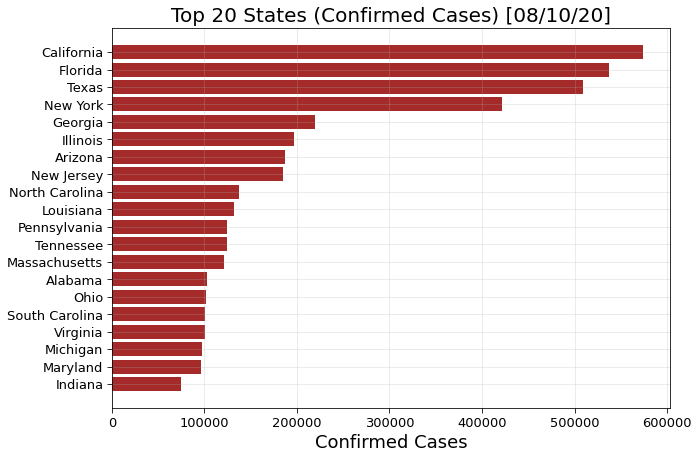

In [17]:
# 확진자수 상위 20개 주 차트 생성

plt.figure(figsize=(10,7))
plt.barh(Top20CF["Province_state"],Top20CF["confirmed"],color="brown")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 20 States (Confirmed Cases) [08/10/20]",fontsize=20)
plt.grid(alpha=0.3)
plt.gca().invert_yaxis()

In [18]:
# 사망자수 상위 20개 주 sql 분석

Top20Deaths = spark.sql("""
select Province_state, deaths
from covid_usa_v
order by deaths desc
limit 20
""").toPandas()

Top20Deaths.head

<bound method NDFrame.head of     Province_state  deaths
0         New York   32781
1       New Jersey   15878
2       California   10476
3            Texas    9230
4    Massachusetts    8741
5          Florida    8277
6         Illinois    7846
7     Pennsylvania    7314
8         Michigan    6526
9      Connecticut    4444
10       Louisiana    4287
11         Georgia    4229
12         Arizona    4154
13            Ohio    3673
14        Maryland    3591
15         Indiana    3044
16        Virginia    2327
17  North Carolina    2199
18  South Carolina    2048
19     Mississippi    1912>

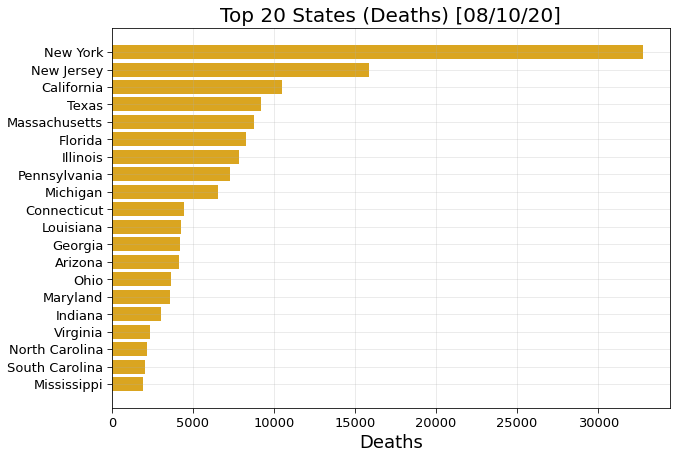

In [19]:
# 사망자 수 상위 20개 주 차트 생성

plt.figure(figsize=(10,7))
plt.barh(Top20Deaths["Province_state"],Top20Deaths["deaths"],color="goldenrod")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 20 States (Deaths) [08/10/20]",fontsize=20)
plt.grid(alpha=0.3)
plt.gca().invert_yaxis()